In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('../../')
import sklearn.datasets as datasets
from models import cmlp
from utility import fits
from sklearn.datasets import  make_circles
from sklearn.model_selection import train_test_split

In [2]:

X,Y =  make_circles(noise=0, factor=0.5, random_state=1,n_samples=200)

In [3]:
X,Y =  datasets.make_moons(200, noise=0.2)

X.shape,Y.shape

((200, 2), (200,))

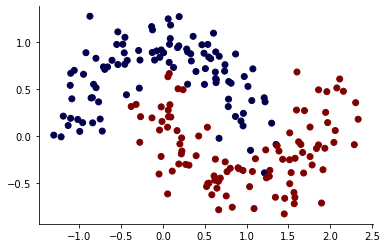

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap='seismic')
sns.despine()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [6]:
model = cmlp.MLP([64,48,16])


In [7]:
params =  model.init(jax.random.PRNGKey(10),X_train)
params, loss = fits.fit(model, params, X_train, y_train,learning_rate=0.01, epochs=50, verbose=True)

Loss step 0:  0.70786613
Loss step 5:  0.50740266
Loss step 10:  0.34880304
Loss step 15:  0.32829103
Loss step 20:  0.29207608
Loss step 25:  0.2695721
Loss step 30:  0.2511223
Loss step 35:  0.22234777
Loss step 40:  0.18891591
Loss step 45:  0.14517356


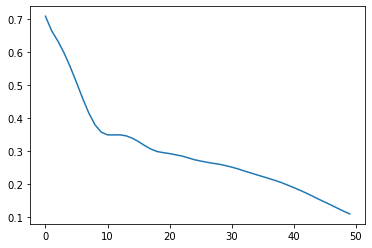

In [8]:

plt.plot(jnp.arange(0,50,1),loss)

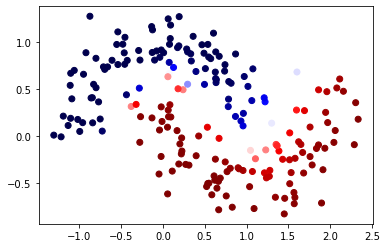

In [9]:
y_pred=model.apply(params,X_train)
y_pred_  = y_pred*(1-y_pred)

y_pred_train_single=y_pred.reshape(134)
y_pred_test_single = model.apply(params,X_test).reshape(66)
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred_test_single,cmap='seismic')
plt.scatter(X_train[:,0],X_train[:,1],c=y_pred,cmap='seismic')




In [10]:
from sklearn.metrics import brier_score_loss
brier_score_loss(y_train,y_pred_train_single),brier_score_loss(y_test,y_pred_test_single)


(0.02748187495260575, 0.018213063563532108)

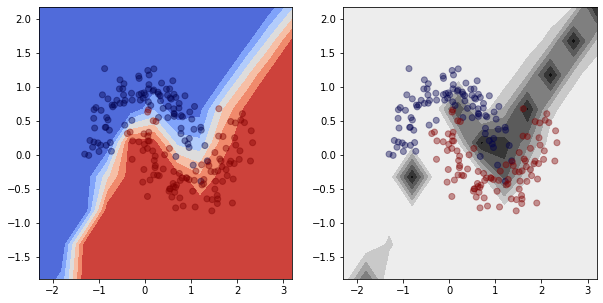

In [11]:
h=0.5
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = jnp.meshgrid(jnp.arange(x_min, x_max, h),
                     jnp.arange(y_min, y_max, h))
Z =model.apply(params,jnp.c_[xx.ravel(), yy.ravel()])
Z_ = Z*(1-Z)
Z= Z.reshape(xx.shape)
Z_= Z_.reshape(xx.shape)
ax2.contourf(xx, yy, Z_,cmap='binary')
ax1.contourf(xx, yy, Z,cmap='coolwarm')
# fig.colorbar()

ax1.scatter(X[:,0],X[:,1],c=Y,alpha=0.4,cmap='seismic')
ax2.scatter(X[:,0],X[:,1],c=Y,alpha=0.4,cmap='seismic')
# plt.ylim(-1.2,1.4)

In [12]:
params_lst= []
loss_lst =[]

for i in range(5):
    params =  model.init(jax.random.PRNGKey(i),X)
    params,loss = fits.fit(model, params, X_train, y_train,learning_rate=0.01, epochs=50, verbose=False)
    params_lst.append(params)
    loss_lst.append(loss)

    

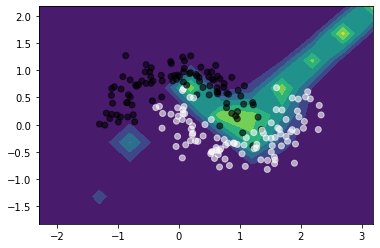

In [13]:
y_pred_grid_ensemble = []
for i in range(5):
    y_pred = model.apply(params,jnp.c_[xx.ravel(), yy.ravel()])
    y_pred_grid_ensemble.append(y_pred)
pred = jnp.array(y_pred_grid_ensemble).mean(axis=0)


Z_ = pred*(1-pred)
Z = pred.reshape(xx.shape)
Z_= Z_.reshape(xx.shape)
plt.contourf(xx, yy, Z_,cmap='viridis')
plt.scatter(X[:,0],X[:,1],c=Y,alpha=.6,cmap='binary_r')
# plt.ylim(-1.2,1.3)


In [14]:
y_pred_train_ensemble = []
y_pred_test_ensemble = []
for i in range(5):
    y_pred_ = model.apply(params_lst[i],X_train)
    y_pred_t = model.apply(params_lst[i],X_test)

    y_pred_train_ensemble.append(y_pred_)
    y_pred_test_ensemble.append(y_pred_t)
y_pred_train_ensemble = jnp.array(y_pred_train_ensemble).mean(axis=0)
y_pred_test_ensemble = jnp.array(y_pred_test_ensemble).mean(axis=0)


In [15]:
brier_score_loss(y_train,y_pred_train_ensemble),brier_score_loss(y_test,y_pred_test_ensemble)

(0.025260786883826925, 0.017937362104057053)

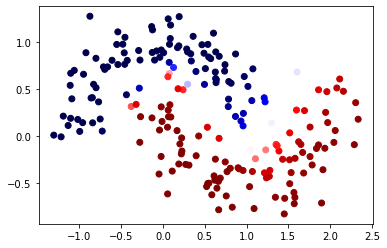

In [16]:
y_pred_train_ensemble=y_pred_train_ensemble.reshape(134)
y_pred_test_single =y_pred_test_ensemble.reshape(66)
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred_test_ensemble,cmap='seismic')
plt.scatter(X_train[:,0],X_train[:,1],c=y_pred_train_ensemble,cmap='seismic')
